## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [258]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [158]:
# load the data - it is available open source and online

data = pd.read_csv('titanic_survival.csv')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [159]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [160]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [161]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [162]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [163]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [165]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [166]:
target = 'survived'

In [167]:
vars_num = [var for var in data.columns if data[var].dtypes!='O' ]# fill your code here

vars_cat = [var for var in data.columns if data[var].dtypes=='O']# fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))

print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [168]:
# first in numerical variables

vars_num

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

In [169]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [173]:
missing_numerical=[var for var in data[vars_num] if data[var].isnull().sum()>0]
data[missing_numerical].isnull().mean()

age     0.200917
fare    0.000764
dtype: float64

In [174]:
# now in categorical variables
missin_cat=[var for var in  data[vars_cat] if data[var].isnull().sum()>0]
data[missin_cat].isnull().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

### Determine cardinality of categorical variables

In [175]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

In [176]:
data[vars_num].nunique()

pclass        3
survived      2
age          98
sibsp         7
parch         8
fare        281
dtype: int64

In [177]:
discrete=[var for var in data[vars_num] if data[var].nunique()<20]
data[discrete].head(5)
for var in discrete:
    data.groupby(var)
   

In [178]:
continuous =[var for var in data[vars_num] if var not in discrete]
continuous

['age', 'fare']

### Determine the distribution of numerical variables

In [179]:
a=data.groupby('pclass')['survived'].agg(pd.Series.mode)

In [70]:
a

pclass
1    1
2    0
3    0
Name: survived, dtype: int64

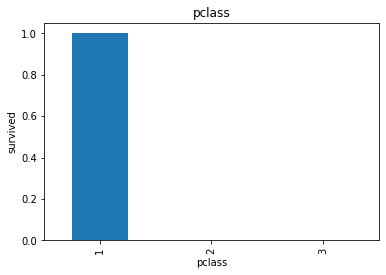

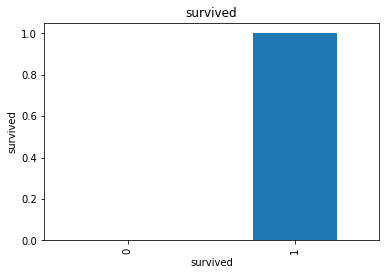

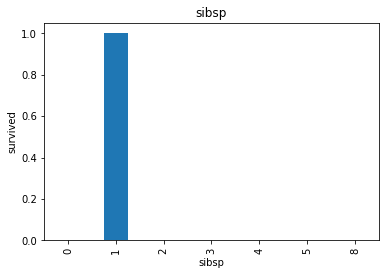

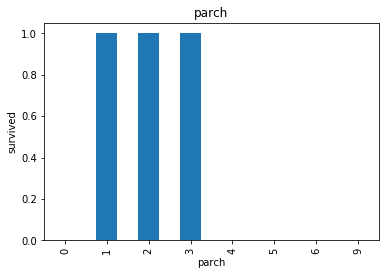

In [180]:

def discrete_analysis(df,row):
    df = df.copy()
    df.groupby(row)['survived'].agg(pd.Series.mode).plot.bar()
    plt.title(row)
    plt.ylabel('survived')
    plt.show()
    
for var in discrete:
    discrete_analysis(data, var)

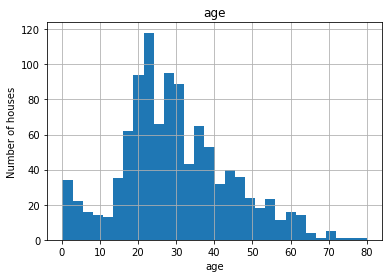

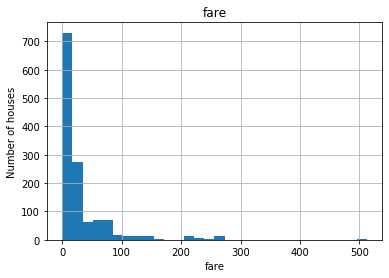

In [72]:

def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in continuous:
    analyse_continuous(data, var)

In [311]:
X=data.copy()
y=data['survived'].copy()
X.drop('survived',axis=1)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,female,25.0000,1,2,151.5500,C22,S,Mrs
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,NaN,C,Miss
1305,3,female,NaN,1,0,14.4542,NaN,C,Miss
1306,3,male,26.5000,0,0,7.2250,NaN,C,Mr
1307,3,male,27.0000,0,0,7.2250,NaN,C,Mr


In [312]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [313]:
nums=[var for var in vars_num if var != 'survived']

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [315]:
X['cabin'].str.replace('[^a-zA-Z]','')

0         B
1         C
2         C
3         C
4         C
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [316]:
miss_X_num=[var for var in nums if X[var].isnull().sum()>0]

In [319]:
X[miss_X_num] = X[miss_X_num].fillna(X_train[miss_X_num].mean())

In [320]:
X[miss_X_num].isnull().mean()

age     0.0
fare    0.0
dtype: float64

### Replace Missing data in categorical variables with the string **Missing**

In [321]:
mis_cat_X=[var for var in vars_cat if X[var].isnull().sum()>0 ]

In [324]:
X[mis_cat_X] = X[mis_cat_X].fillna('Missing')

In [325]:
X.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [326]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [327]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var).count() / len(df)

    return tmp[tmp > rare_perc].index


In [329]:
for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X[var] = np.where(X[var].isin(frequent_ls), X[var], 'Rare')
    
    

In [330]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [331]:
X=pd.get_dummies(X,drop_first=True)

In [332]:
X.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,cabin_A11,cabin_A14,cabin_A16,cabin_A18,cabin_A19,cabin_A20,cabin_A21,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A31,cabin_A32,cabin_A34,cabin_A36,cabin_A5,cabin_A6,cabin_A7,cabin_A9,cabin_B10,cabin_B101,cabin_B102,cabin_B11,cabin_B18,cabin_B19,cabin_B20,cabin_B22,cabin_B24,cabin_B26,cabin_B28,cabin_B3,cabin_B30,cabin_B35,cabin_B36,cabin_B37,cabin_B38,cabin_B39,cabin_B4,cabin_B41,cabin_B42,cabin_B45,cabin_B49,cabin_B5,cabin_B50,cabin_B51,cabin_B52,cabin_B57,cabin_B58,cabin_B61,cabin_B69,cabin_B71,cabin_B73,cabin_B77,cabin_B78,cabin_B79,cabin_B80,cabin_B82,cabin_B86,cabin_B94,cabin_B96,cabin_C101,cabin_C103,cabin_C104,cabin_C105,cabin_C106,cabin_C110,cabin_C111,cabin_C116,cabin_C118,cabin_C123,cabin_C124,cabin_C125,cabin_C126,cabin_C128,cabin_C130,cabin_C132,cabin_C148,cabin_C2,cabin_C22,cabin_C23,cabin_C28,cabin_C30,cabin_C31,cabin_C32,cabin_C39,cabin_C45,cabin_C46,cabin_C47,cabin_C49,cabin_C50,cabin_C51,cabin_C52,cabin_C53,cabin_C54,cabin_C55,cabin_C6,cabin_C62,cabin_C65,cabin_C68,cabin_C7,cabin_C70,cabin_C78,cabin_C80,cabin_C82,cabin_C83,cabin_C85,cabin_C86,cabin_C87,cabin_C89,cabin_C90,cabin_C91,cabin_C92,cabin_C93,cabin_C95,cabin_C97,cabin_C99,cabin_D,cabin_D10,cabin_D11,cabin_D15,cabin_D17,cabin_D19,cabin_D20,cabin_D21,cabin_D22,cabin_D26,cabin_D28,cabin_D30,cabin_D33,cabin_D34,cabin_D35,cabin_D36,cabin_D37,cabin_D38,cabin_D40,cabin_D43,cabin_D45,cabin_D46,cabin_D47,cabin_D48,cabin_D49,cabin_D50,cabin_D56,cabin_D6,cabin_D7,cabin_D9,cabin_E10,cabin_E101,cabin_E12,cabin_E121,cabin_E17,cabin_E24,cabin_E25,cabin_E31,cabin_E33,cabin_E34,cabin_E36,cabin_E38,cabin_E39,cabin_E40,cabin_E44,cabin_E45,cabin_E46,cabin_E49,cabin_E50,cabin_E52,cabin_E58,cabin_E60,cabin_E63,cabin_E67,cabin_E68,cabin_E77,cabin_E8,cabin_F,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_Missing,cabin_T,embarked_Missing,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,1,1,29.0000,0,0,211.3375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,1,0.9167,1,2,151.5500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,2.0000,1,2,151.5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1,0,30.0000,1,2,151.5500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [333]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

### Scale the variables

- Use the standard scaler from Scikit-learn

In [335]:
cols=X.columns

In [336]:
scaler = StandardScaler()

scaler.fit(X[cols]) 

X[cols]= scaler.transform(X[cols])


In [337]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 195), (262, 195))

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [339]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [340]:
y_predict=logreg.predict(X_test)

In [341]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[162   0]
 [  0 100]]


In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       100

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [347]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
logit_roc_auc

1.0

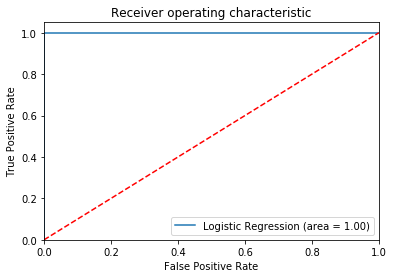

In [348]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [349]:
accuracy_score(y_test,y_predict)

1.0

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**